In [7]:
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
import sys

%matplotlib inline

In [8]:
today_str = date.today().strftime("%d%B%Y")
datafile = 'sd_covid_dataset.csv'

In [11]:
df = pd.read_csv(datafile) 

## Total cases in San Diego

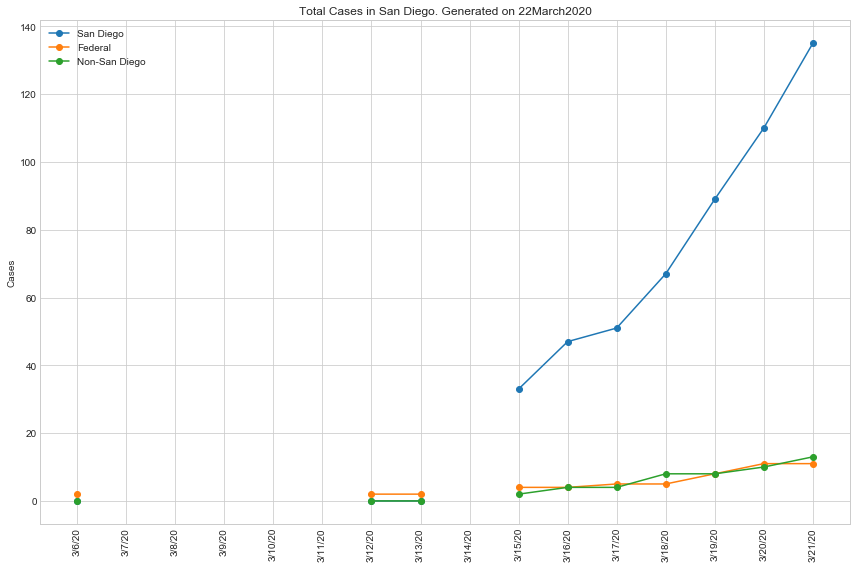

In [61]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], df['sd_total'], '-o', label="San Diego")
ax.plot(df['date'], df['fed_total'], '-o', label="Federal")
ax.plot(df['date'], df['nonsd_total'], '-o', label="Non-San Diego")
plt.ylabel("Cases")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.title('Total Cases in San Diego. Generated on '+today_str)
plt.tight_layout()
plt.savefig("./plots/totalcasesinSanDiego_"+today_str+".png")

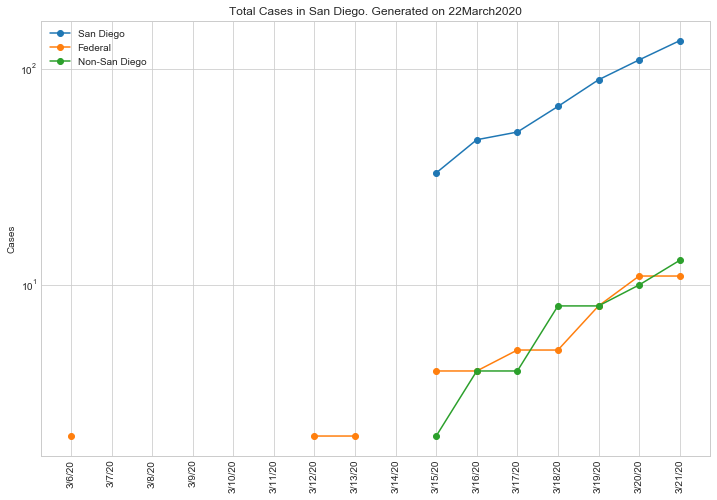

In [64]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], df['sd_total'], '-o', label="San Diego")
ax.plot(df['date'], df['fed_total'], '-o', label="Federal")
ax.plot(df['date'], df['nonsd_total'], '-o', label="Non-San Diego")
plt.ylabel("Cases")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.title('Total Cases in San Diego. Generated on '+today_str)
plt.yscale('log')
plt.savefig("./plots/totalcasesinSanDiego_logscale_"+today_str+".png")

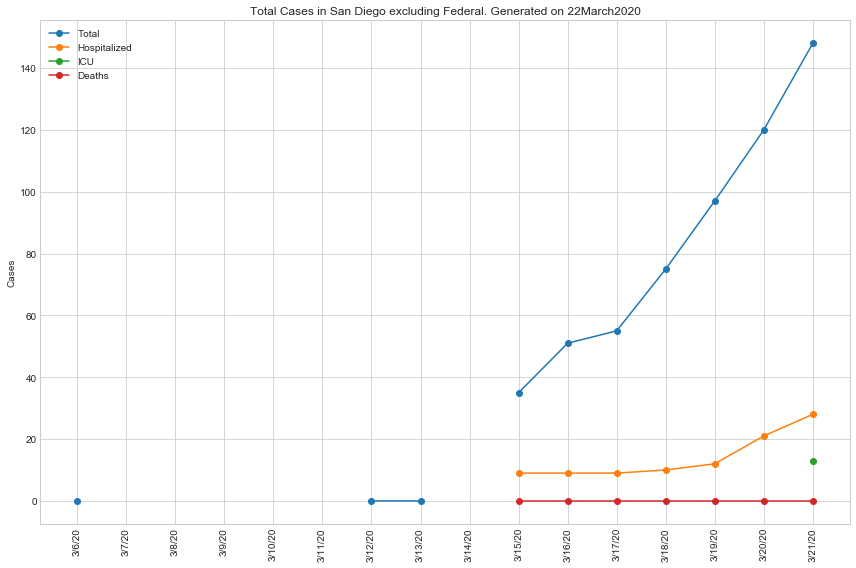

In [70]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], df['sd_total']+df['nonsd_total'], '-o', label="Total")
ax.plot(df['date'], df['sd_hosp']+df['nonsd_hosp'], '-o', label="Hospitalized")
ax.plot(df['date'], df['sd_icu']+df['nonsd_icu'], '-o', label="ICU")
ax.plot(df['date'], df['sd_death']+df['nonsd_death'], '-o', label="Deaths")

plt.ylabel("Cases")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.title('Total Cases in San Diego excluding Federal. Generated on '+today_str)
plt.tight_layout()
plt.savefig("./plots/totalcasesinSanDiego_nonfederal_"+today_str+".png")

## Breakdown by region

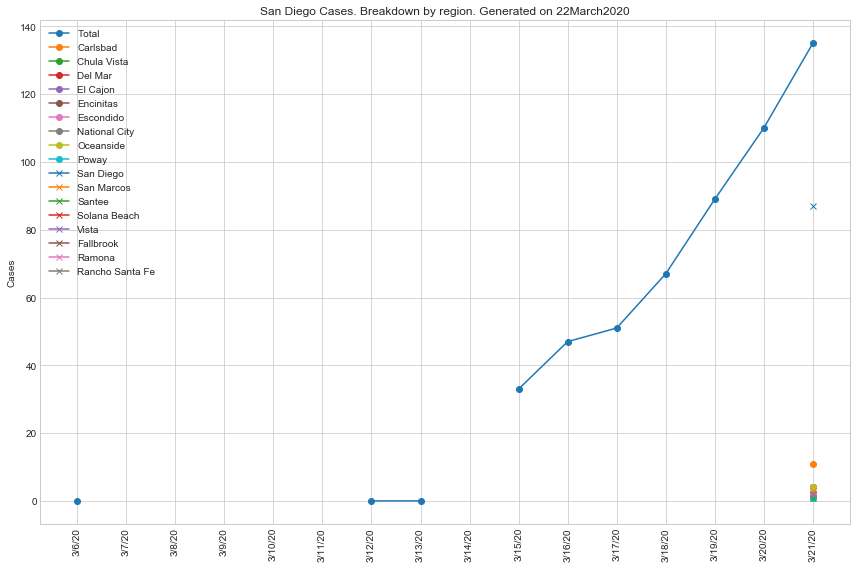

In [86]:
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date'], df['sd_total'], '-o', label="Total")
ax.plot(df['date'], df['carlsbad'], '-o', label="Carlsbad")
ax.plot(df['date'], df['chulavista'], '-o', label="Chula Vista")
ax.plot(df['date'], df['delmar'], '-o', label="Del Mar")
ax.plot(df['date'], df['elcajon'], '-o', label="El Cajon")
ax.plot(df['date'], df['encinitas'], '-o', label="Encinitas")
ax.plot(df['date'], df['escondido'], '-o', label="Escondido")
ax.plot(df['date'], df['nationalcity'], '-o', label="National City")
ax.plot(df['date'], df['oceanside'], '-o', label="Oceanside")
ax.plot(df['date'], df['poway'], '-o', label="Poway")
ax.plot(df['date'], df['sandiego'], '-x', label="San Diego")
ax.plot(df['date'], df['sanmarcos'], '-x', label="San Marcos")
ax.plot(df['date'], df['santee'], '-x', label="Santee")
ax.plot(df['date'], df['solanabeach'], '-x', label="Solana Beach")
ax.plot(df['date'], df['vista'], '-x', label="Vista")
ax.plot(df['date'], df['fallbrook'], '-x', label="Fallbrook")
ax.plot(df['date'], df['ramona'], '-x', label="Ramona")
ax.plot(df['date'], df['ranchosantafe'], '-x', label="Rancho Santa Fe")
plt.ylabel("Cases")
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.title('San Diego Cases. Breakdown by region. Generated on '+today_str)
plt.tight_layout()
plt.savefig("./plots/breakdownbyregion_"+today_str+".png")